In [1]:
#The data below has been imported from the COVID 19 World patient database from the following sources:
#1.https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv
#2.https://github.com/datasets/covid-19/blob/master/data/worldwide-aggregated.csv
#3.https://ourworldindata.org/grapher/full-list-total-tests-for-covid-19
#All three  data sources have  a count of the total number of COVID 19 cases,recoveries,deaths and total tests done worldwide,which using a Matplotlip model,
# and mathematic modelling,the code takes the data and plots them next to each other on a log scale.
#The goal is to see how India fairs in comparison to other countries based on their growth rate and the 4 criteria mentioned above.
#The graphs from this code are put up on my website @ https://sites.google.com/site/sohamdasgupta04.
import matplotlib
import lmfit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit.models import LorentzianModel, ExponentialModel, PowerLawModel
from numpy import linspace
plt.close('all')
from pprint import pprint
from datetime import timedelta, date

In [2]:
last_k = 7
df_us = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df = pd.read_csv("latest_data.csv")
df2 = pd.read_csv("TEST_UPDATE.csv")
df_new = pd.read_csv("BOOK5.csv")
dfd=pd.read_csv("Book1.csv")
df2['Positive rate']=df2['IndiaConfirmed']/df2['IndiaTest']*100

In [3]:
df_us.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [4]:
df2

,IndiaTest,IndiaConfirmed,TNT,TNC,KLT,KLC,KAT,KAC,DLT,DLC,...,India,TN,KL,KA,DL,MH,WB,MP,GJ,Positive rate
0,12500,151,690.0,48.0,11986.0,9.0,6967.0,6.0,9041.0,93.0,...,500.0,150.0,700.0,600.0,800.0,4000.0,300.0,400.0,1500.0,1.208000
1,13125,173,834.0,96.0,12710.0,12.0,7613.0,16.0,9968.0,51.0,...,625.0,144.0,724.0,646.0,927.0,4123.0,402.0,286.0,1676.0,1.318095
2,14175,223,911.0,77.0,13339.0,7.0,7975.0,10.0,11061.0,183.0,...,1050.0,77.0,629.0,362.0,1093.0,6841.0,206.0,1079.0,1818.0,1.573192
3,15404,283,969.0,58.0,14163.0,10.0,8560.0,8.0,11709.0,166.0,...,1229.0,58.0,824.0,585.0,648.0,3827.0,191.0,1914.0,2045.0,1.837185
4,16911,360,1075.0,106.0,14989.0,2.0,9251.0,17.0,14036.0,85.0,...,1507.0,106.0,826.0,691.0,2327.0,4057.0,237.0,1467.0,1952.0,2.128792
5,18127,433,1173.0,98.0,15683.0,3.0,10017.0,15.0,15032.0,356.0,...,1216.0,98.0,694.0,766.0,996.0,1346.0,270.0,1965.0,2536.0,2.388702
6,20707,519,1204.0,31.0,16235.0,8.0,11107.0,13.0,16282.0,51.0,...,2580.0,31.0,552.0,1090.0,1250.0,4071.0,288.0,319.0,729.0,2.506399
7,22694,606,1242.0,38.0,16475.0,1.0,12483.0,19.0,16605.0,17.0,...,1987.0,38.0,240.0,1376.0,323.0,5740.0,389.0,600.0,4217.0,2.670309
8,25144,694,1267.0,25.0,17400.0,7.0,13724.0,36.0,18784.0,62.0,...,2450.0,25.0,925.0,1241.0,2179.0,4796.0,341.0,600.0,1706.0,2.760102
9,26300,824,1323.0,56.0,18029.0,1.0,17594.0,44.0,21409.0,67.0,...,1156.0,56.0,629.0,3870.0,2625.0,4488.0,401.0,1492.0,2580.0,3.133080


In [5]:
df_new

,India,Japan,Israel,Australia,South Korea,Canada,Germany,US,UK,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1065.0,1502.0,49075.0,28901.0,12585.0,27094.0,33202.0,25594.0,22522.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2863.961814,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23936.170210,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2857.142857,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Transform India data : Since we iterate over dates, it is easier to have dates as rows instead of columns 
------------------

In [6]:

df['India']=df['Confirmed'].iloc[-1]/df['TI'].iloc[0]*100
df['Japan']=df['TCJ'].iloc[-1]/df['TJ'].iloc[0]*100
df['Israel']=df['TCIS'].iloc[-1]/df['TIS'].iloc[0]*100
df['Australia']=df['TCA'].iloc[-1]/df['TA'].iloc[0]*100
df['South Korea']=df['TCSK'].iloc[-1]/df['TSK'].iloc[0]*100
df['Canada']=df['TCC'].iloc[-1]/df['TC'].iloc[0]*100
df['Germany']=df['TCG'].iloc[-1]/df['TG'].iloc[0]*100
df['US']=df['TCUS'].iloc[-1]/df['TUS'].iloc[0]*100
df['UK']=df['TCUK'].iloc[-1]/df['TUK'].iloc[0]*100

df_new=pd.DataFrame()
df_new['India']=df['India'].iloc[0]
df_new['Japan']=df['Japan'].iloc[0]
df_new['Israel']=df['Israel'].iloc[0]
df_new['Australia']=df['Australia'].iloc[0]
df_new['South Korea']=df['South Korea'].iloc[0]
df_new['Canada']=df['Canada'].iloc[0]
df_new['Germany']=df['Germany'].iloc[0]
df_new['US']=df['US'].iloc[0]
df_new['UK']=df['UK'].iloc[0]
df['TUK']

0     945299.0
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
57         NaN
58         NaN
59         NaN
60         NaN
61         NaN
Name: TUK, Length: 62, dtype: float64

In [7]:
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

start_dt = date(2020, 3, 10)
end_dt = date(2020, 4, 30)
analysis_dates = []
for dt in daterange(start_dt, end_dt):
    analysis_dates.append(dt.strftime("%Y-%m-%d"))

In [8]:
analysis_dates

['2020-03-10',
 '2020-03-11',
 '2020-03-12',
 '2020-03-13',
 '2020-03-14',
 '2020-03-15',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-21',
 '2020-03-22',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-28',
 '2020-03-29',
 '2020-03-30',
 '2020-03-31',
 '2020-04-01',
 '2020-04-02',
 '2020-04-03',
 '2020-04-04',
 '2020-04-05',
 '2020-04-06',
 '2020-04-07',
 '2020-04-08',
 '2020-04-09',
 '2020-04-10',
 '2020-04-11',
 '2020-04-12',
 '2020-04-13',
 '2020-04-14',
 '2020-04-15',
 '2020-04-16',
 '2020-04-17',
 '2020-04-18',
 '2020-04-19',
 '2020-04-20',
 '2020-04-21',
 '2020-04-22',
 '2020-04-23',
 '2020-04-24',
 '2020-04-25',
 '2020-04-26',
 '2020-04-27',
 '2020-04-28',
 '2020-04-29',
 '2020-04-30']

In [9]:
df

,Date,Confirmed,Recovered,Deaths,TCJ,TRJ,TDJ,TCIS,TRIS,TDIS,...,Death rate,India,Japan,Israel,Australia,South Korea,Canada,Germany,US,UK
0,04-03-2020,30,3,0,331,43,6,15,1,0,...,0.000000,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262
1,05-03-2020,39,3,0,360,43,6,20,1,0,...,0.000000,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262
2,06-03-2020,43,4,0,420,46,6,37,2,0,...,0.000000,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262
3,07-03-2020,56,4,1,461,76,6,43,2,0,...,0.000000,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262
4,08-03-2020,62,4,1,502,76,6,61,2,0,...,0.000000,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,30-04-2020,39699,12847,1566,14088,2460,430,15946,8561,222,...,3.310100,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262
58,01-05-2020,42505,13847,1580,14305,2975,455,16101,9156,225,...,3.282605,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262
59,02-05-2020,44000,14847,1600,14571,3205,474,16185,9593,229,...,3.332578,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262
60,03-05-2020,46437,15847,1650,14877,3981,487,16208,9749,232,...,3.272556,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262


In [10]:
df_growth=pd.DataFrame();

df_growth['India']=df.Confirmed.pct_change()*100
df_growth['Japan']=df.TCJ.pct_change()*100
df_growth['Israel']=df.TCIS.pct_change()*100
df_growth['World']=df.TCW.pct_change()*100
df_growth['US']=df.TCUS.pct_change()*100
df_growth['UK']=df.TCUK.pct_change()*100
df_growth['Brazil']=df.TCB.pct_change()*100
df_growth['Germany']=df.TCG.pct_change()*100
df_growth['Canada']=df.TCC.pct_change()*100
df_growth['Australia']=df.TCA.pct_change()*100
df_growth['South Korea']=df.TCSK.pct_change()*100

df_growth
df['Positive rate']=df['New confirmed']/df['New tests']*100

In [11]:
# Transform India data
#india_data = []

#for index, row in df_india.iterrows():
   # i=1
   # for d in analysis_dates:
     #   data_point = {
            
      #      'date' : d,
      #      'cases' : row[i],
      #      'Country':row[0]     
      #  }
     #   i=i+1
     #   india_data.append(data_point)

#df_india_transform = pd.DataFrame(india_data)


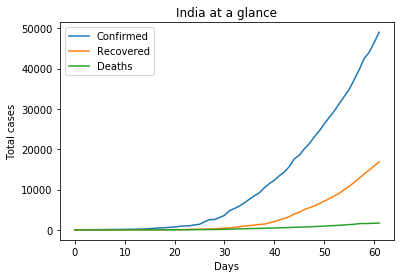

In [12]:
ax = plt.gca()
df.plot(y='Confirmed', kind = 'line',ax=ax)
df.plot(y='Recovered', kind = 'line',ax=ax)
df.plot(y='Deaths', kind = 'line',ax=ax)
plt.xlabel('Days')
plt.ylabel('Total cases')
plt.title('India at a glance')

plt.savefig('India.jpeg')
plt.show()

In [13]:
df_growth


,India,Japan,Israel,World,US,UK,Brazil,Germany,Canada,Australia,South Korea
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30.000000,8.761329,33.333333,2.907906,45.637584,34.883721,0.000000,83.969466,12.121212,5.769231,8.308130
2,10.256410,16.666667,85.000000,3.999550,20.737327,41.379310,225.000000,39.004149,32.432432,9.090909,8.295007
3,30.232558,9.761905,16.216216,3.974421,53.435115,26.219512,0.000000,19.253731,10.204082,5.000000,6.795086
4,10.714286,8.893709,41.860465,3.754476,28.855721,32.367150,53.846154,30.162703,18.518519,20.634921,3.877290
...,...,...,...,...,...,...,...,...,...,...,...
57,6.554473,1.388989,0.707339,2.665774,2.838229,3.628914,9.414570,0.909997,3.011444,0.207346,0.083604
58,7.068188,1.540318,0.972031,2.668957,3.182741,3.596918,5.752004,0.655179,3.463283,0.177357,0.055690
59,3.517233,1.859490,0.521707,2.499150,2.635163,2.694686,5.312249,0.542428,2.809577,0.309826,0.120594
60,5.538636,2.100062,0.142107,2.316255,2.251666,2.366213,4.867147,0.422509,4.450506,0.338285,0.074122


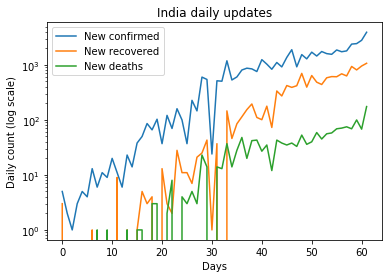

In [14]:
ax = plt.gca()
df.plot(y='New confirmed', kind = 'line',ax=ax)
df.plot(y='New recovered', kind = 'line',ax=ax)
df.plot(y='New deaths', kind = 'line',ax=ax)
ax.set_yscale('log')
ax.set_xlabel('Days')
ax.set_ylabel('Daily count (log scale)')
plt.title('India daily updates')
plt.savefig('India_now.jpeg')
plt.show()

In [15]:
dfs=pd.DataFrame()
dfs['P.r']=df2['Positive rate']
dfs['Positive rate']=dfs.rolling(7).mean()
dfs

,P.r,Positive rate
0,1.208000,NaN
1,1.318095,NaN
2,1.573192,NaN
3,1.837185,NaN
4,2.128792,NaN
5,2.388702,NaN
6,2.506399,1.851481
7,2.670309,2.060382
8,2.760102,2.266383
9,3.133080,2.489224


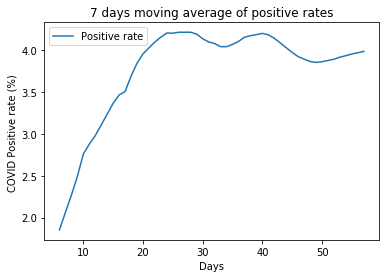

In [16]:
ax = plt.gca()
dfs.plot(y='Positive rate', kind = 'line',ax=ax)

plt.title('7 days moving average of positive rates')
plt.xlabel('Days')
plt.ylabel('COVID Positive rate (%) ')
plt.savefig('Positive.jpeg')
plt.show()

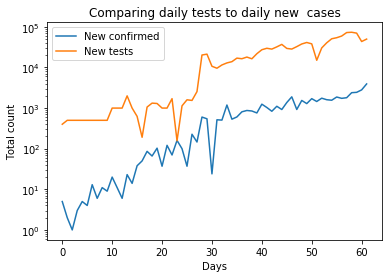

In [17]:
ax = plt.gca()
dfd.plot(y='New confirmed', kind = 'line',ax=ax)
dfd.plot(y='New tests', kind = 'line',ax=ax)


plt.title('Comparing daily tests to daily new  cases')
ax.set_yscale('log')
plt.xlabel('Days')

plt.ylabel('Total count')
plt.savefig('statepositive.jpeg')
plt.show()

Total number of cases for each date
--

Generate plots
---

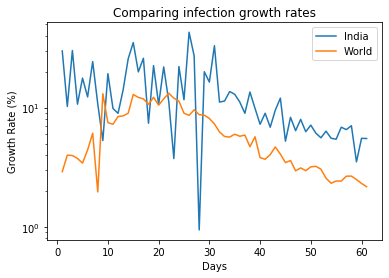

In [18]:
ax = plt.gca()
df_growth.plot(y='India', kind = 'line',ax=ax)
#df_growth.plot(y='US', kind = 'line',ax=ax)
df_growth.plot(y='World', kind = 'line',ax=ax)
#df_growth.plot(y='South Korea', kind = 'line',ax=ax)
#df_growth.plot(y='Japan', kind = 'line',ax=ax)
#df_growth.plot(y='Brazil', kind = 'line',ax=ax)
#df_growth.plot(y='Germany', kind = 'line',ax=ax)
#df_growth.plot(y='Israel', kind = 'line',ax=ax)
#df_growth.plot(y='Canada', kind = 'line',ax=ax)
#df_growth.plot(y='Australia', kind = 'line',ax=ax)
#df_growth.plot(y='UK', kind = 'line',ax=ax)
plt.xlabel('Days')
plt.ylabel('Growth Rate (%)')
plt.title('Comparing infection growth rates')
ax.set_yscale('log')
plt.savefig('world_India.jpeg')
plt.show()

In [19]:
df

,Date,Confirmed,Recovered,Deaths,TCJ,TRJ,TDJ,TCIS,TRIS,TDIS,...,India,Japan,Israel,Australia,South Korea,Canada,Germany,US,UK,Positive rate
0,04-03-2020,30,3,0,331,43,6,15,1,0,...,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262,1.250000
1,05-03-2020,39,3,0,360,43,6,20,1,0,...,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262,0.400000
2,06-03-2020,43,4,0,420,46,6,37,2,0,...,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262,0.200000
3,07-03-2020,56,4,1,461,76,6,43,2,0,...,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262,0.600000
4,08-03-2020,62,4,1,502,76,6,61,2,0,...,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,30-04-2020,39699,12847,1566,14088,2460,430,15946,8561,222,...,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262,2.485749
58,01-05-2020,42505,13847,1580,14305,2975,455,16101,9156,225,...,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262,3.247907
59,02-05-2020,44000,14847,1600,14571,3205,474,16185,9593,229,...,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262,3.484241
60,03-05-2020,46437,15847,1650,14877,3981,487,16208,9749,232,...,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262,6.443169


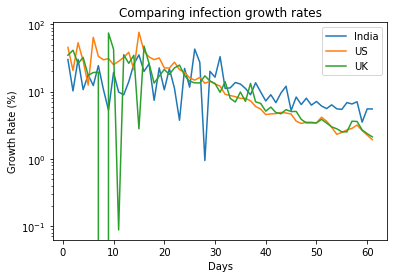

In [20]:
ax = plt.gca()
df_growth.plot(y='India', kind = 'line',ax=ax)
df_growth.plot(y='US', kind = 'line',ax=ax)
#df_growth.plot(y='World', kind = 'line',ax=ax)
#df_growth.plot(y='South Korea', kind = 'line',ax=ax)
#df_growth.plot(y='Japan', kind = 'line',ax=ax)
#df_growth.plot(y='Brazil', kind = 'line',ax=ax)
#df_growth.plot(y='Germany', kind = 'line',ax=ax)
#df_growth.plot(y='Israel', kind = 'line',ax=ax)
#df_growth.plot(y='Canada', kind = 'line',ax=ax)
#df_growth.plot(y='Australia', kind = 'line',ax=ax)
df_growth.plot(y='UK', kind = 'line',ax=ax)
plt.xlabel('Days')
plt.ylabel('Growth Rate (%)')
plt.title('Comparing infection growth rates')
ax.set_yscale('log')
plt.savefig('uk_US_India.jpeg')
plt.show()

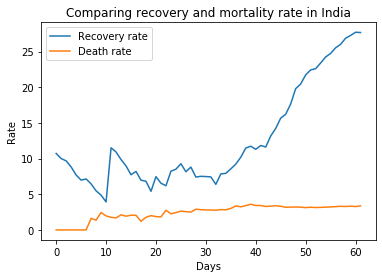

In [21]:
ax = plt.gca()
df.plot(y='Recovery rate', kind = 'line',ax=ax)
df.plot(y='Death rate', kind = 'line',ax=ax)
plt.xlabel('Days')
plt.ylabel('Rate')
plt.title('Comparing recovery and mortality rate in India')
plt.savefig('confirmedvsrecovery6thmay.jpeg')
plt.show()

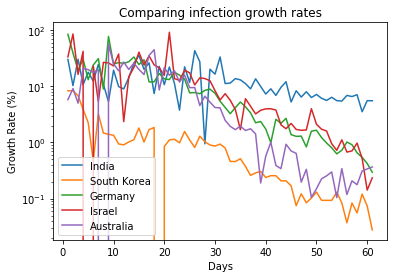

In [22]:
ax = plt.gca()
df_growth.plot(y='India', kind = 'line',ax=ax)
#df_growth.plot(y='US', kind = 'line',ax=ax)
#df_growth.plot(y='World', kind = 'line',ax=ax)
df_growth.plot(y='South Korea', kind = 'line',ax=ax)
#df_growth.plot(y='Japan', kind = 'line',ax=ax)
#df_growth.plot(y='Brazil', kind = 'line',ax=ax)
df_growth.plot(y='Germany', kind = 'line',ax=ax)
df_growth.plot(y='Israel', kind = 'line',ax=ax)
#df_growth.plot(y='Canada', kind = 'line',ax=ax)
df_growth.plot(y='Australia', kind = 'line',ax=ax)
#df_growth.plot(y='UK', kind = 'line',ax=ax)
plt.xlabel('Days')
plt.ylabel('Growth Rate (%)')
plt.title('Comparing infection growth rates')
ax.set_yscale('log')
plt.savefig('sk_germany_israel_India.jpeg')
plt.show()

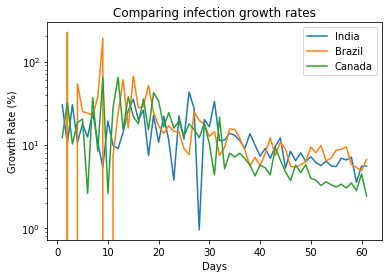

In [23]:
ax = plt.gca()
df_growth.plot(y='India', kind = 'line',ax=ax)
#df_growth.plot(y='US', kind = 'line',ax=ax)
#df_growth.plot(y='World', kind = 'line',ax=ax)
#df_growth.plot(y='South Korea', kind = 'line',ax=ax)
#df_growth.plot(y='Japan', kind = 'line',ax=ax)
df_growth.plot(y='Brazil', kind = 'line',ax=ax)
#df_growth.plot(y='Germany', kind = 'line',ax=ax)
#df_growth.plot(y='Israel', kind = 'line',ax=ax)
df_growth.plot(y='Canada', kind = 'line',ax=ax)
plt.xlabel('Days')
plt.ylabel('Growth Rate (%)')
plt.title('Comparing infection growth rates')
#df_growth.plot(y='Australia', kind = 'line',ax=ax)
#df_growth.plot(y='UK', kind = 'line',ax=ax)
ax.set_yscale('log')
plt.savefig('ca_brazil_India.jpeg')
plt.show()

In [24]:
df

,Date,Confirmed,Recovered,Deaths,TCJ,TRJ,TDJ,TCIS,TRIS,TDIS,...,India,Japan,Israel,Australia,South Korea,Canada,Germany,US,UK,Positive rate
0,04-03-2020,30,3,0,331,43,6,15,1,0,...,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262,1.250000
1,05-03-2020,39,3,0,360,43,6,20,1,0,...,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262,0.400000
2,06-03-2020,43,4,0,420,46,6,37,2,0,...,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262,0.200000
3,07-03-2020,56,4,1,461,76,6,43,2,0,...,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262,0.600000
4,08-03-2020,62,4,1,502,76,6,61,2,0,...,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,30-04-2020,39699,12847,1566,14088,2460,430,15946,8561,222,...,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262,2.485749
58,01-05-2020,42505,13847,1580,14305,2975,455,16101,9156,225,...,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262,3.247907
59,02-05-2020,44000,14847,1600,14571,3205,474,16185,9593,229,...,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262,3.484241
60,03-05-2020,46437,15847,1650,14877,3981,487,16208,9749,232,...,4.298246,8.16855,4.027188,1.053038,1.704313,6.739086,6.523306,16.734918,20.293262,6.443169


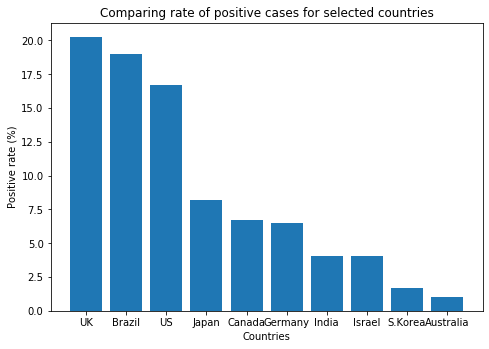

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['UK','Brazil','US','Japan','Canada','Germany','India','Israel','S.Korea','Australia']
students = [20.29,19,16.73,8.16,6.73,6.52,4.07,4.027,1.70,1.05]

ax.bar(langs,students)
plt.xlabel('Countries')
plt.ylabel('Positive rate (%)')
plt.title('Comparing rate of positive cases for selected countries')
plt.savefig('positivity rate world.jpeg')
plt.show()

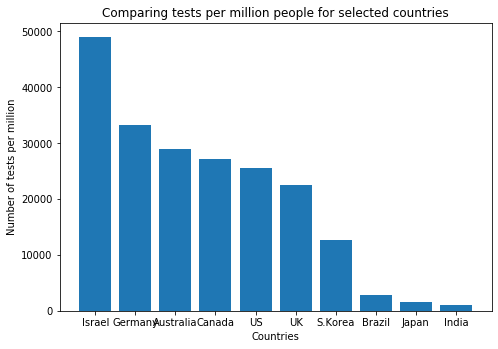

In [26]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Israel','Germany','Australia','Canada','US','UK','S.Korea','Brazil','Japan','India']
students = [49075,33202,28901,27094,25594,22522,12585,2864,1502,1065]

students
ax.bar(langs,students)
plt.xlabel('Countries')
plt.ylabel('Number of tests per million')
plt.title('Comparing tests per million people for selected countries')
plt.savefig('tests per million world.jpeg')
plt.show()